In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import preprocessing as pp
import numpy as np
from IPython.core import display as ICD
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
from PIL import Image
from skimage import morphology
import preprocessing as pp
import predict as magic
import cv2
from skimage.feature import hog
from sklearn.model_selection import cross_val_score

train = pd.read_csv('data/MINIST/train.csv')
yt = train['label'].as_matrix()
Xt = train.drop('label', 1).as_matrix()
Xt = Xt / 255
mlp = MLPClassifier()
mlp.fit(Xt, yt)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

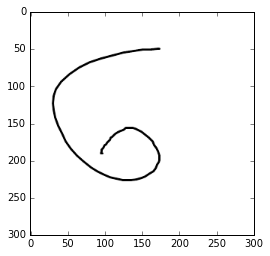

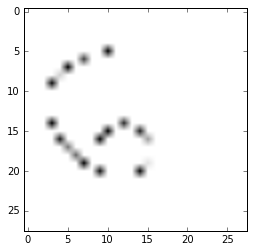

[4]


In [47]:
from skimage import io
from skimage import color
from skimage import transform

image = io.imread('data/MYDIGITS/6.png')
image = color.rgb2gray(image)
image = 1 - image
plt.imshow(image, cmap="Greys")
plt.show()
image = transform.resize(image, (28,28))
plt.imshow(image, cmap="Greys")
plt.show()
image = image.flatten()
ypred = mlp.predict(np.array([image]))
print(ypred)

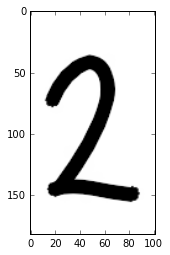

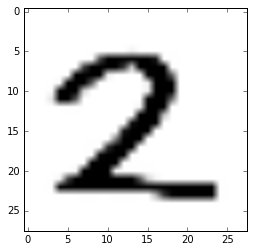

[2]


In [67]:
from skimage import transform
from skimage import filters
from skimage import morphology # import erosion, dilation, opening, closing, white_tophat

image = io.imread('data/MYDIGITS/Data0.jpg')
image = color.rgb2gray(image)
image = 1 - image
image = morphology.dilation(image, selem = morphology.disk(5))

plt.imshow(image, cmap="Greys")
plt.show()
image = transform.resize(image, (28,28))
# image = morphology.dilation(image, selem = morphology.disk(2))
# image = filters.gaussian(image, sigma=1)
plt.imshow(image, cmap="Greys")
plt.show()
ypred = mlp.predict(np.array([image.flatten()]))
print(ypred)